## Import CMIP6 output

In [1]:
import intake

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


Open the metadata using the catalog .json file

In [2]:
# full path on glade
#catalog = intake.open_esm_datastore("/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cmip6.json")
# shortcut from github template
#catalog = intake.open_esm_datastore("../catalogs/glade-cmip6.json") # doesn't have CanESM fx output vars
catalog = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json") # this doesn't work w/o internet access
#catalog

Look at top of dataframe

In [3]:
catalog.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,prsn,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN


What are the unique experiment ids?

In [4]:
catalog.unique(['experiment_id'])

{'experiment_id': {'count': 29,
  'values': ['ssp370',
   'esm-ssp585',
   '1pctCO2-bgc',
   'hist-bgc',
   '1pctCO2',
   'abrupt-4xCO2',
   'historical',
   'piControl',
   'amip',
   'esm-hist',
   'esm-piControl',
   'hist-GHG',
   'hist-aer',
   'hist-nat',
   'dcppA-assim',
   'dcppA-hindcast',
   'dcppC-hindcast-noAgung',
   'dcppC-hindcast-noElChichon',
   'dcppC-hindcast-noPinatubo',
   'highresSST-present',
   'control-1950',
   'hist-1950',
   'deforest-globe',
   'esm-ssp585-ssp126Lu',
   'omip1',
   'lgm',
   'ssp126',
   'ssp245',
   'ssp585']}}

What are the unique table ids?

In [5]:
catalog.unique(['table_id'])

{'table_id': {'count': 23,
  'values': ['Amon',
   'Lmon',
   'Oyr',
   'Omon',
   'SImon',
   'day',
   '3hr',
   '6hrLev',
   'LImon',
   'Aclim',
   'Ofx',
   'fx',
   'Emon',
   '6hrPlev',
   'Oclim',
   'SIclim',
   'Eclim',
   'Odec',
   'AERmon',
   'ImonGre',
   '6hrPlevPt',
   'CF3hr',
   'E3hr']}}

Interested in experiment id "esm-ssp585"

In [6]:
sr_esm_nbp = catalog.search(experiment_id='esm-ssp585', variable_id='nbp')
sr_esm_nbp

pangeo-cmip6-ESM Collection with 4 entries:
	> 1 activity_id(s)

	> 2 institution_id(s)

	> 2 source_id(s)

	> 1 experiment_id(s)

	> 3 member_id(s)

	> 1 table_id(s)

	> 1 variable_id(s)

	> 1 grid_label(s)

	> 4 zstore(s)

	> 0 dcpp_init_year(s)

In [7]:
#sr_esm_nbp.df.iloc[0].path # for glade catalog only
sr_esm_nbp.df.iloc[0].zstore

'gs://cmip6/C4MIP/CCCma/CanESM5/esm-ssp585/r1i1p1f1/Lmon/nbp/gn/'

What models have this output?

In [8]:
sr_esm_nbp.unique('source_id')

{'source_id': {'count': 2, 'values': ['CanESM5', 'CESM2']}}

In [9]:
sr_esm_nbp.unique('member_id') # note - not all models have same number of ensemble members

{'member_id': {'count': 3, 'values': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1']}}

In [10]:
sr_esm_nbp.unique('grid_label')

{'grid_label': {'count': 1, 'values': ['gn']}}

Search for fixed variable output (e.g., gridcell area, landfrac) for the same model and first ensemble member

In [11]:
sr_fx = catalog.search(table_id = ['fx'], source_id = ['CanESM5','CESM2'], member_id = 'r1i1p1f1')
sr_fx

pangeo-cmip6-ESM Collection with 14 entries:
	> 2 activity_id(s)

	> 2 institution_id(s)

	> 2 source_id(s)

	> 4 experiment_id(s)

	> 1 member_id(s)

	> 1 table_id(s)

	> 4 variable_id(s)

	> 1 grid_label(s)

	> 14 zstore(s)

	> 0 dcpp_init_year(s)

In [12]:
sr_fx.unique('experiment_id')

{'experiment_id': {'count': 4,
  'values': ['historical', 'piControl', 'ssp245', 'ssp585']}}

Do another search to pick out only one experiment id (use historical for now since it has both area and landfrac)

In [13]:
sr_fx_ctrl = catalog.search(table_id = ['fx'], source_id = ['CanESM5','CESM2'], member_id = 'r1i1p1f1', experiment_id = 'historical')
sr_fx_ctrl

pangeo-cmip6-ESM Collection with 8 entries:
	> 1 activity_id(s)

	> 2 institution_id(s)

	> 2 source_id(s)

	> 1 experiment_id(s)

	> 1 member_id(s)

	> 1 table_id(s)

	> 4 variable_id(s)

	> 1 grid_label(s)

	> 8 zstore(s)

	> 0 dcpp_init_year(s)

In [14]:
sr_fx_ctrl.unique('variable_id')

{'variable_id': {'count': 4,
  'values': ['areacella', 'orog', 'sftgif', 'sftlf']}}

Do another search to subset further - area (areacella) and landfrac (sftlf) only

In [124]:
#sr_fx_ctrl_vars = catalog.search(table_id = ['fx'], source_id = ['CanESM5','CESM2'], member_id = 'r1i1p1f1', experiment_id = 'historical', variable_id = ['areacella', 'sftlf'])
sr_fx_ctrl_vars = catalog.search(table_id = ['fx'], source_id = ['CanESM5','CESM2'], member_id = ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'], experiment_id = 'historical', variable_id = ['areacella', 'sftlf'])
sr_fx_ctrl_vars

pangeo-cmip6-ESM Collection with 12 entries:
	> 1 activity_id(s)

	> 2 institution_id(s)

	> 2 source_id(s)

	> 1 experiment_id(s)

	> 3 member_id(s)

	> 1 table_id(s)

	> 2 variable_id(s)

	> 1 grid_label(s)

	> 12 zstore(s)

	> 0 dcpp_init_year(s)

Check that fx output grid label matches variable output (hopefully good enough to use based on that?)

In [125]:
sr_fx_ctrl_vars.unique('grid_label')

{'grid_label': {'count': 1, 'values': ['gn']}}

## Convert fx dataframe to dictionary, keys will be models, datasets will concatenate along ensemble member

In [126]:
fx_ds = sr_fx_ctrl_vars.to_dataset_dict()
fx_ds

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 2 group(s)


{'CMIP.CCCma.CanESM5.historical.fx.gn': <xarray.Dataset>
 Dimensions:    (bnds: 2, lat: 64, lon: 128, member_id: 3)
 Coordinates:
   * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
   * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
   * member_id  (member_id) <U8 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
 Dimensions without coordinates: bnds
 Data variables:
     lat_bnds   (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
     lon_bnds   (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
     areacella  (member_id, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
     type       |S4 ...
     sftlf      (member_id, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
 Attributes:
     nominal_resolution:          500 km
     physics_index:               1
     source:                      CanESM5 (2019): \naerosol: interactive\natmo...
     grid:                       

In [127]:
fx_ds.keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.fx.gn', 'CMIP.NCAR.CESM2.historical.fx.gn'])

In [128]:
fx_ds_cesm = fx_ds['CMIP.NCAR.CESM2.historical.fx.gn']
landfrac_cesm = fx_ds_cesm.sftlf
area_cesm = fx_ds_cesm.areacella
#area_cesm.units # area in m^2
#landfrac_cesm.units # landfrac in % so divide by 100 to get frac
#landfrac_cesm.values

In [129]:
landfrac_cesm_frac = landfrac_cesm / 100
#landfrac_cesm_frac.values

In [130]:
fx_ds_canesm = fx_ds['CMIP.CCCma.CanESM5.historical.fx.gn']
landfrac_canesm = fx_ds_canesm.sftlf
area_canesm = fx_ds_canesm.areacella
#area_canesm.units # area in m^2
#landfrac_canesm.units # landfrac in % so divide by 100 to get frac
#landfrac_canesm.values

In [131]:
landfrac_canesm_frac = landfrac_canesm / 100
#landfrac_canesm_frac.values

## Convert variable search dataframe to dictionary

In [23]:
esm_nbp_ds = sr_esm_nbp.to_dataset_dict()

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 2 group(s)


In [24]:
esm_nbp_ds

{'C4MIP.CCCma.CanESM5.esm-ssp585.Lmon.gn': <xarray.Dataset>
 Dimensions:    (bnds: 2, lat: 64, lon: 128, member_id: 3, time: 1032)
 Coordinates:
   * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
   * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
   * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
   * member_id  (member_id) <U8 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
 Dimensions without coordinates: bnds
 Data variables:
     lat_bnds   (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
     time_bnds  (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
     lon_bnds   (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
     nbp        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 64, 128), meta=np.ndarray>
 Attributes:
     nominal_resolution:          500 km
     physics_index:               1
     source:                      CanESM5 (2017): \

What are the dictionary keys?

In [25]:
esm_nbp_ds.keys()

dict_keys(['C4MIP.CCCma.CanESM5.esm-ssp585.Lmon.gn', 'C4MIP.NCAR.CESM2.esm-ssp585.Lmon.gn'])

Access dataset from dictionary using appropriate key

In [193]:
nbp_ds_canesm = esm_nbp_ds['C4MIP.CCCma.CanESM5.esm-ssp585.Lmon.gn']
nbp_canesm = nbp_ds_canesm.nbp
nbp_cesm = esm_nbp_ds['C4MIP.NCAR.CESM2.esm-ssp585.Lmon.gn'].nbp
#nbp_cesm.units
#nbp_cesm.values # includes nans over ocean
#nbp_canesm.values # has a fillvalues ~10^-16 over ocean?
#nbp_canesm
nbp_canesm.sel(lat='-50', lon='90', method='nearest')[0,:].values
#nbp_cesm.sel(lat='-50', lon='90', method='nearest').values

array([ 2.26253988e-16,  2.18719511e-16,  1.04977525e-16, ...,
        5.17354648e-16, -2.39271587e-17,  1.66172207e-16], dtype=float32)

## Plotting NBP so far

In [27]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

(1, 1032, 192, 288)


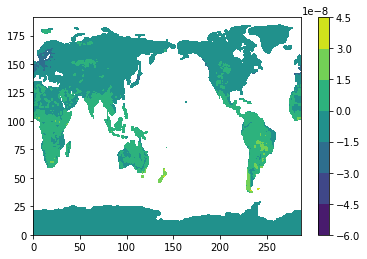

In [132]:
print(nbp_cesm.shape)
plt.contourf(nbp_cesm[0,0,:,:])
plt.colorbar()

(3, 1032, 64, 128)


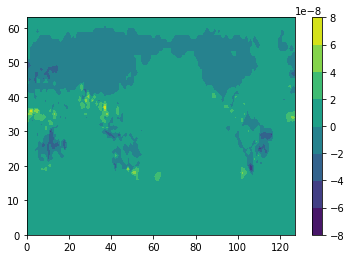

In [133]:
print(nbp_canesm.shape)
plt.contourf(nbp_canesm[0,0,:,:])
plt.colorbar()

In [44]:
def weighted_annual_mean(array):
    mon_day  = xr.DataArray(np.array([31,28,31,30,31,30,31,31,30,31,30,31]), dims=['month'])
    mon_wgt  = mon_day/mon_day.sum()
    return (array.rolling(time=12, center=False) # rolling
            .construct("month") # construct the array
            .isel(time=slice(11, None, 12)) # slice so that the first element is [1..12], second is [13..24]
            .dot(mon_wgt, dims=["month"]))

In [45]:
spy = 365 * 24 * 3600  # Convert  to annual fluxes (kgC/m2/y), from kgC/m2/s 

In [163]:
nbp_canesm_amean = weighted_annual_mean(nbp_canesm) * spy
nbp_canesm_amean.attrs['units'] = 'kgC m-2 y-1'
nbp_canesm_amean # 3 ensemble members for CanESM
nbp_canesm_amean.lat
#nbp_canesm_amean.values
plt.contourf(nbp_canesm_amean[0,0,:,:])
plt.colorbar()

SyntaxError: invalid syntax (<ipython-input-163-b6fd1a8a9b83>, line 8)

In [162]:
nbp_cesm_amean = weighted_annual_mean(nbp_cesm) * spy
nbp_cesm_amean.attrs['units'] = 'kgC m-2 y-1'
#nbp_cesm_amean.lat # single ensemble member for CESM
nbp_cesm_amean

<xarray.DataArray (member_id: 1, time: 86, lat: 192, lon: 288)>
dask.array<mul, shape=(1, 86, 192, 288), dtype=float64, chunksize=(1, 86, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 2015-12-15 12:00:00 ... 2100-12-15 12:00:00
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes:
    units:    kgC m-2 y-1

### Making weights for global sums

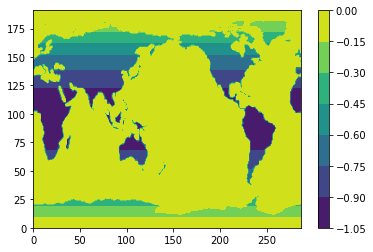

In [134]:
landUp_cesm = area_cesm * landfrac_cesm_frac
#print(landUp_cesm.lat)
area_wgt_cesm = landUp_cesm / landUp_cesm.sum() # weighting for each grid cell
#print(landUp_cesm.sum().values)
#print(area_wgt_cesm.min().values, area_wgt_cesm.max().values)
area_wgt_cesm_alt = landUp_cesm / landUp_cesm.max()
#print(landUp_cesm.max().values)
#print(area_wgt_cesm_alt.min().values, area_wgt_cesm_alt.max().values)
#print(area_wgt_cesm.lat)
#plt.contourf(area_wgt_cesm[0,:,:])
testdiffs = area_wgt_cesm.values - area_wgt_cesm_alt.values
plt.contourf(testdiffs[0,:,:])
plt.colorbar()

In [77]:
#plt.contourf(area_wgt_cesm_alt[0,:,:])

In [136]:
#print(area_wgt_cesm.lat.values - nbp_cesm_amean.lat.values) # differences in latitudes
#latdiffs = area_wgt_cesm.lat.values - nbp_cesm_amean.lat.values
latdiffs = landUp_cesm.lat.values - nbp_cesm_amean.lat.values
#print(latdiffs)

In [139]:
landUp_cesm_modlat = landUp_cesm # create new landUp
#area_wgt_cesm_modlat.lat.values = area_wgt_cesm.lat.values + latdiffs
#print(area_wgt_cesm_modlat.lat.values)
#print(area_wgt_cesm_modlat.lat.values - nbp_cesm_amean.lat.values)
landUp_cesm_modlat.lat.values = nbp_cesm_amean.lat.values # just assign landUp lats to match nbp lats
#print(landUp_cesm_modlat.lat.values - nbp_cesm_amean.lat.values) # sanity check
landUp_cesm_modlat

<xarray.DataArray (member_id: 3, lat: 192, lon: 288)>
dask.array<mul, shape=(3, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * member_id  (member_id) <U8 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'

In [140]:
landUp_canesm = area_canesm * landfrac_canesm_frac
landUp_canesm
#print(landUp_canesm.lat)
#latdiffs = landUp_canesm.lat.values - nbp_canesm_amean.lat.values
#print(latdiffs)
#area_wgt_canesm = landUp_canesm / landUp_canesm.sum()
#area_wgt_canesm

<xarray.DataArray (member_id: 3, lat: 64, lon: 128)>
dask.array<mul, shape=(3, 64, 128), dtype=float32, chunksize=(1, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * member_id  (member_id) <U8 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'

### Global sum

In [155]:
mean_wgt_cesm = nbp_cesm_amean * landUp_cesm_modlat[0,:,:] # first ensemble member only
#mean_wgt_cesm = nbp_cesm_amean.dot(landUp_cesm_modlat)
#print(mean_wgt_cesm)
#plt.contourf(mean_wgt_cesm[0,0,:,:])
#plt.colorbar()
ann_glob_cesm = mean_wgt_cesm.sum(dim=('lat','lon')) * 1e-12 #convert to Pg/y
ann_glob_cesm.attrs['units'] = 'Pg C y^-1'
#print(ann_glob_cesm.values)

<xarray.DataArray (member_id: 3, time: 86)>
dask.array<mul, shape=(3, 86), dtype=float64, chunksize=(1, 86), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 2015-12-16 12:00:00 ... 2100-12-16 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
Attributes:
    units:    Pg C y^-1


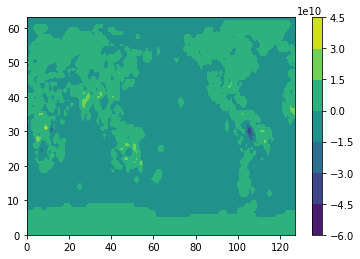

In [156]:
mean_wgt_canesm = nbp_canesm_amean * landUp_canesm
#print(mean_wgt_canesm)
#plt.contourf(mean_wgt_canesm[0,0,:,:])
#plt.colorbar()
ann_glob_canesm = mean_wgt_canesm.sum(dim=('lat','lon')) * 1e-12 #convert to Pg/y
ann_glob_canesm.attrs['units'] = 'Pg C y^-1'
print(ann_glob_canesm)

### Make a line plot

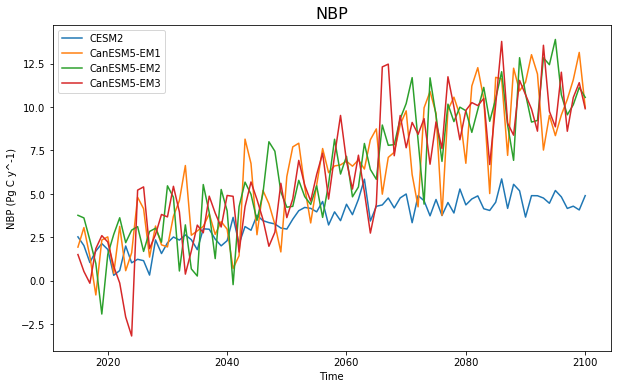

In [195]:
fig = plt.figure(figsize=(10, 6))

# Ask, out of a 1x1 grid, the first axes.
ax = fig.add_subplot(1, 1, 1)

# Plot times as x-variable and temperatures as y-variable
ax.plot(ann_glob_cesm.coords['time.year'], ann_glob_cesm[0,:], label='CESM2')
ax.plot(ann_glob_canesm.coords['time.year'], ann_glob_canesm[0,:], label='CanESM5-EM1')
ax.plot(ann_glob_canesm.coords['time.year'], ann_glob_canesm[1,:], label='CanESM5-EM2')
ax.plot(ann_glob_canesm.coords['time.year'], ann_glob_canesm[2,:], label='CanESM5-EM3')
# Add some labels to the plot
ax.set_xlabel('Time')
ax.set_ylabel('NBP'+' (' + ann_glob_cesm.attrs['units'] +')')
ax.set_title('NBP', fontdict={'size':16})
ax.legend(loc='upper left');
#plt.savefig('cesm_canesm_EM1_esm585_nbp.pdf')

### Grab the other two ensemble members from CanESM

In [122]:
#nbp_canesm_amean
landUp_canesm
#mean_wgt_canesm = nbp_canesm_amean[2,:,:,:] * landUp_canesm 
#mean_wgt_canesm

<xarray.DataArray (member_id: 1, lat: 64, lon: 128)>
dask.array<mul, shape=(1, 64, 128), dtype=float32, chunksize=(1, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * member_id  (member_id) <U8 'r1i1p1f1'

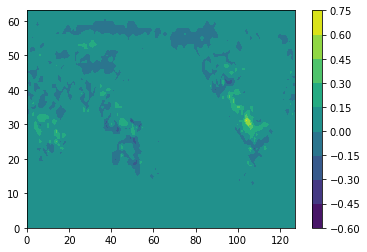

In [117]:
plt.contourf(amean[0,0,:,:])
plt.colorbar()

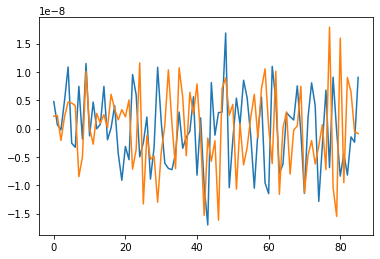

In [115]:
plt.plot(amean[0,:,0,0])
plt.plot(amean[1,:,0,0])

In [101]:
spy = 365 * 24 * 3600  # Convert  to annual fluxes (kgC/m2/y), from kgC/m2/s 
mean_dataset = da.apply(weighted_annual_mean) * spy
mean_dataset.attrs['units'] = 'kgC m-2 y-1'

AttributeError: 'DataArray' object has no attribute 'apply'